![](images/18_00.png)

In [26]:
mydata = read.csv("./data/diabetes.csv")

In [27]:
head(mydata)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [28]:
dim(mydata)

[1] 768   9

In [29]:
str(mydata)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [30]:
summary(mydata)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [31]:
library(Amelia)

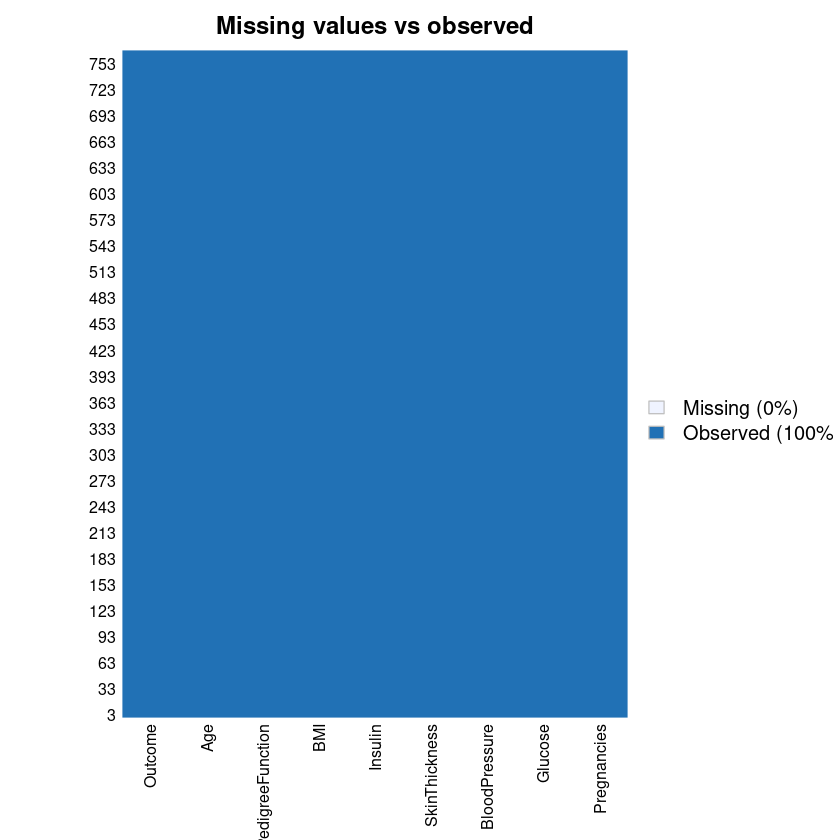

In [32]:
missmap(mydata, main = "Missing values vs observed")

In [33]:
table(mydata$Outcome)


  0   1 
500 268 

In [34]:
correlations = cor(mydata[, 1:9])

correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
Outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000


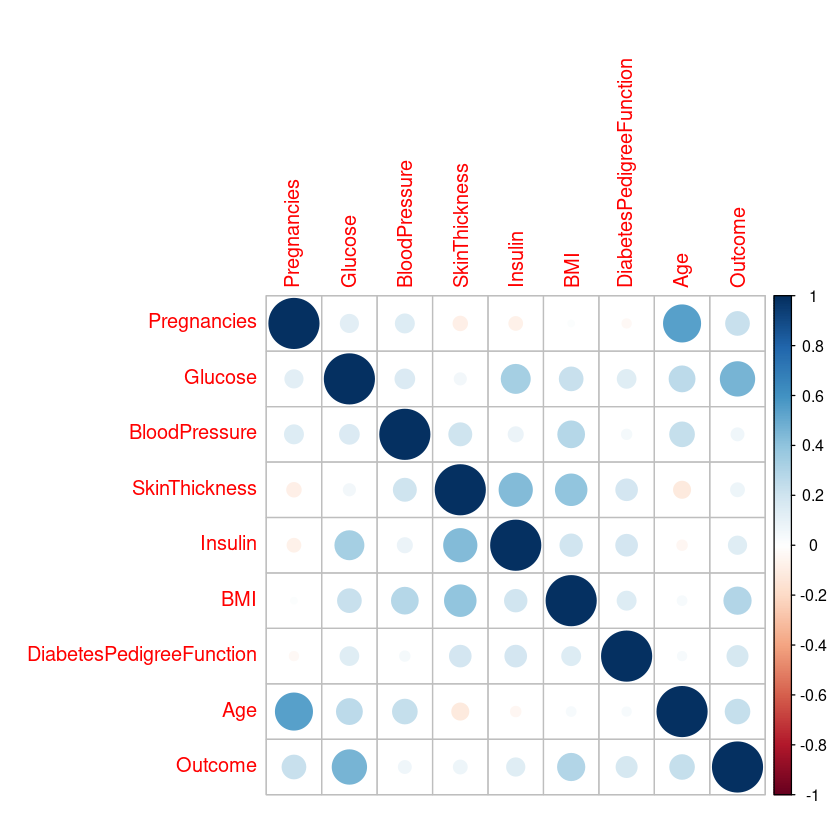

In [35]:
corrplot(correlations, method = 'circle')

In [37]:
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7 * n), replace = FALSE)
train = mydata[trainIndex,]
test = mydata[-trainIndex,]

In [38]:
mylogit = glm(Outcome ~ ., data = train, family = 'binomial')

In [39]:
summary(mylogit)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8336  -0.7109  -0.3578   0.6796   2.7423  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.843627   0.970238 -10.146  < 2e-16 ***
Pregnancies               0.129212   0.038977   3.315 0.000916 ***
Glucose                   0.039788   0.004832   8.235  < 2e-16 ***
BloodPressure            -0.006829   0.006352  -1.075 0.282288    
SkinThickness            -0.006583   0.008416  -0.782 0.434121    
Insulin                  -0.001910   0.001127  -1.694 0.090248 .  
BMI                       0.105888   0.019391   5.461 4.75e-08 ***
DiabetesPedigreeFunction  1.164010   0.377687   3.082 0.002057 ** 
Age                       0.008992   0.011258   0.799 0.424446    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [40]:
pred = predict(mylogit, newdata = test, type = 'response')
pred_value = ifelse(pred > .5, 1, 0)

In [41]:
result = data.frame(testAdmit = test$Outcome[30:40], pred_value[30:40])

result

,testAdmit,pred_value.30.40.
,<int>,<dbl>
127,0,0
128,0,0
129,1,0
132,1,1
137,0,0
139,0,0
140,0,0
143,0,0
144,1,0


In [42]:
accuracy = table(pred_value, test[, 'Outcome'])
accuracy = sum(diag(accuracy)) / sum(accuracy)

accuracy

[1] 0.7521739

In [44]:
1 - mean(pred_value != test$Outcome)

[1] 0.7521739

In [46]:
y1 = predict(mylogit, newdata = data.frame(
                Pregnancies = c(8, 1, 12),
                Glucose = c(176, 100, 88),
                BloodPressure = c(90, 66, 74),
                SkinThickness = c(34, 15, 40),
                Insulin = c(300, 56, 54),
                BMI = c(33.7, 23.6, 35.3),
                DiabetesPedigreeFunction = c(0.467, 0.666, 0.378),
                Age = c(58, 26, 48)), type = 'response')

y1 = ifelse(y1 > .5, 1, 0)

y1

1 2 3 
1 0 0